In [32]:
import nibabel as nib
from monai.transforms import LoadImage

load_image = LoadImage(ensure_channel_first=True, image_only=True)

In [33]:
img_path = "/cluster/projects/vc/data/mic/open/BTCV/dataset/RawData/Training/img/img0002.nii.gz"
label_path = "/cluster/projects/vc/data/mic/open/BTCV/dataset/RawData/Training/label/label0002.nii.gz"

img = load_image(img_path)
label = load_image(label_path)

print(img.shape)
print(label.shape)


torch.Size([1, 512, 512, 139])
torch.Size([1, 512, 512, 139])


In [22]:
import glob

In [34]:
images = sorted(
    glob.glob(
        "/cluster/projects/vc/data/mic/open/BTCV/dataset/RawData/Training/img/*.nii.gz"
    )
)
labels = sorted(
    glob.glob(
        "/cluster/projects/vc/data/mic/open/BTCV/dataset/RawData/Training/label/*.nii.gz"
    )
)

images = [load_image(img) for img in images]
labels = [load_image(label) for label in labels]

In [38]:
pixdims = [img.pixdim for img in images]
heights = [img.shape[1] for img in images]
widths = [img.shape[2] for img in images]
depths = [img.shape[3] for img in images]

In [47]:
import numpy as np

In [53]:
print(np.median(np.array([img.pixdim[0].item() for img in images])))
print(np.median(np.array([img.pixdim[1].item() for img in images])))
print(np.median(np.array([img.pixdim[2].item() for img in images])))


0.7578124403953552
0.7578124403953552
3.0


In [1]:
from data_modules.btcv import BTCVDataModule

data_module = BTCVDataModule(
    batch_size=1,
)
data_module.prepare_data()
data_module.setup()

/cluster/home/eriksalv/.conda/envs/mamba/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train subjects: 24
Val subjects: 6


monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.


In [2]:
val_set = data_module.val_set

In [3]:
for i in range(len(val_set)):
    print(val_set[i]["image"].shape)


torch.Size([1, 518, 403, 148])
torch.Size([1, 490, 376, 153])
torch.Size([1, 647, 553, 166])
torch.Size([1, 449, 315, 131])
torch.Size([1, 628, 428, 156])
torch.Size([1, 406, 401, 140])


In [4]:
val_set[0]["label"].shape

torch.Size([14, 518, 403, 148])

In [5]:
import matplotlib.pyplot as plt

In [6]:
sample = val_set[1]

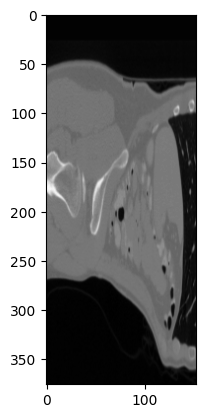

In [7]:
plt.imshow(sample["image"][0, 100, :, :], cmap="gray")
plt.show()


In [8]:
sample["label"][1:].shape


torch.Size([13, 490, 376, 153])